#### Import Statements

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Functions to Perform Simulations

### Simulating Minecraft Speedruns

In [2]:
# Helper functions for run_trial()
def choose_random_num_successes_needed(num_successes_needed2prob):
    r = np.random.random()
    current_prob = 0
    for n in num_successes_needed2prob:
        current_prob += num_successes_needed2prob[n]
        if r < current_prob:
            return n
    raise ValueError("Did not select a num_successes_needed")

In [35]:
def run_trial(num_speedruns, num_successes_needed2prob, success_prob, death_prob):
    """
    Arguments
    =========
    num_speedruns = how many speedruns are performed for this trial
    num_successes_needed2prob = a dictionary mapping the number of successes needed to finish a speedrun
                                to the probability of that number being the one used on a speedrun
    success_prob = the probability of success for a single outcome
    death_prob = the probability of dying after each event
    
    Returns
    =======
    Returns a tuple (num_successes, num_events)
    """
    total_num_successes = 0
    total_num_events = 0
    
    # Make sure the probabilities of the num_successes_needed adds to 1
    if np.abs(sum(num_successes_needed2prob.values()) - 1) > 0.01:
        raise ValueError("Probabilities of num_successes_needed do not sum to 1")
    
    for _ in range(num_speedruns):
        k = choose_random_num_successes_needed(num_successes_needed2prob)
        num_successes = 0
        num_events = 0
        
        # Perform the event until k successes happen
        while num_successes < k:
            outcome = np.random.random()
            if outcome < success_prob:
                num_successes += 1
            num_events += 1
            
            # If the player dies, stop early
            possible_death = np.random.random()
            if possible_death < death_prob:
                break
        
        total_num_successes += num_successes
        total_num_events += num_events
    
    return (total_num_successes, total_num_events)

In [11]:
def run_simulation(num_trials, num_speedruns_per_trial, num_successes_needed2prob, success_prob, death_prob):
    """
    Arguments
    =========
    num_trials = total number of trials to do
    num_speedruns_per_trial = how many speedruns are performed for each trial
    num_successes_needed2prob = a dictionary mapping the number of successes needed to finish a speedrun
                                to the probability of that number being the one used on a speedrun
    success_prob = the probability of success for a single outcome
    death_prob = the probability of dying after each event
    
    Returns
    =======
    Returns a list of proportions (successes/events)
    """
    proportions = []
    for _ in range(num_trials):
        result = run_trial(num_speedruns_per_trial, num_successes_needed2prob, success_prob, death_prob)
        proportion = result[0] / float(result[1])
        proportions.append(proportion)
    
    return proportions

### Binomial Distribution Simulations

In [34]:
def run_binomial_trial(num_events, success_prob):
    """
    Arguments
    =========
    num_events = the number of random events to do
    success_prob = probability of success of any event
    
    Returns
    =======
    Returns tuple (num_successes, num_events)
    """
    num_successes = 0
    
    for _ in range(num_events):
        outcome = np.random.random()
        if outcome < success_prob:
            num_successes += 1
    
    return (num_successes, num_events)

In [36]:
def run_binomial_simulation(num_trials, num_events_per_trial, success_prob):
    """
    Arguments
    =========
    num_trials = number of trials to run
    num_events_per_trial = the number of random events to do for each trial
    success_prob = probability of success of any event
    
    Returns
    =======
    Returns a list of proportions (successes/events)
    """
    proportions = []
    
    for _ in range(num_trials):
        result = run_binomial_trial(num_events_per_trial, success_prob)
        proportions.append(result[0] / float(result[1]))
    
    return proportions

## Simulating Blaze Data

### Speedrun Simulations

In [28]:
num_trials = 100000

# These match Dream's data from the 6 livestreams
num_speedruns_per_trial = 33
num_successes_needed2prob = {6: 4/float(27), 7: 13/float(27), 8: 10/float(27)}
success_prob = 0.5
death_prob = 6/float(33)

In [29]:
results = run_simulation(num_trials, num_speedruns_per_trial, num_successes_needed2prob, success_prob, death_prob)

Text(0, 0.5, 'Frequency')

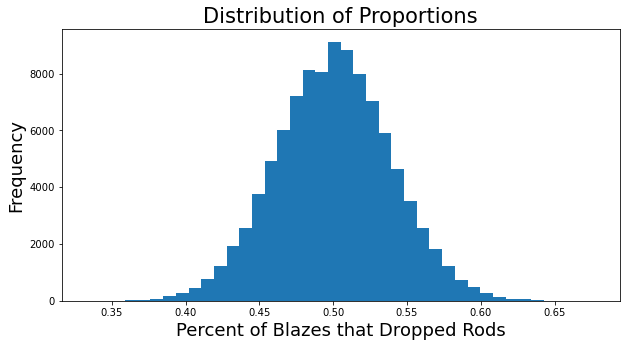

In [33]:
plt.figure(figsize=(10,5))
plt.hist(results, bins=40)
plt.title("Distribution of Proportions", fontsize=21)
plt.xlabel("Percent of Blazes that Dropped Rods", fontsize=18)
plt.ylabel("Frequency", fontsize=18)

In [31]:
df_describe = pd.DataFrame(results)
df_describe.describe()

,0
count,100000.000000
mean,0.500364
std,0.038780
min,0.333333
25%,0.474286
50%,0.500000
75%,0.526316
max,0.676829


### Binomial Simulations

In [37]:
binomial_results = run_binomial_simulation(num_trials, 305, 0.5)

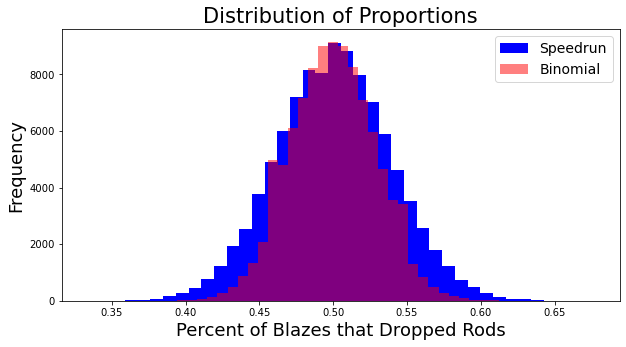

In [46]:
plt.figure(figsize=(10,5))
plt.hist(results, bins=40, color='blue', alpha=1.0, label='Speedrun')
plt.hist(binomial_results, bins=40, color='red', alpha=0.5, label='Binomial')
plt.title("Distribution of Proportions", fontsize=21)
plt.xlabel("Percent of Blazes that Dropped Rods", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.legend(fontsize=14)
plt.show()

In [47]:
df_blaze_binomial = pd.DataFrame(binomial_results)
df_blaze_binomial.describe()

,0
count,100000.000000
mean,0.499883
std,0.028519
min,0.367213
25%,0.481967
50%,0.498361
75%,0.518033
max,0.639344


## Simulating Ender Pearl Data

### Speedrun Simulations

In [48]:
num_trials = 100000

# These match Dream's data from the 6 livestreams
ender_num_speedruns_per_trial = 33
ender_num_successes_needed2prob = {2: 14/float(17), 3: 2/float(17), 5: 1/float(17)}
ender_success_prob = 0.047
ender_death_prob = 5/float(22)

In [49]:
ender_speedrun_results = run_simulation(num_trials, ender_num_speedruns_per_trial, ender_num_successes_needed2prob, ender_success_prob, ender_death_prob)

Text(0, 0.5, 'Frequency')

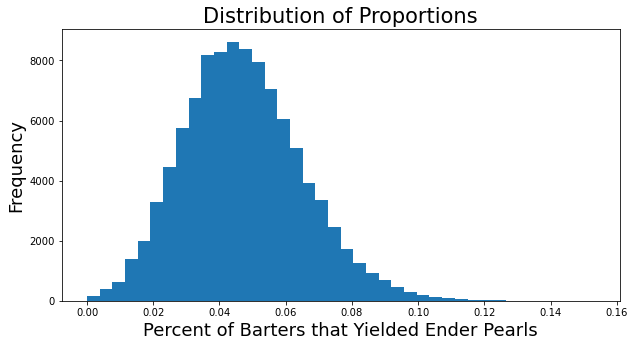

In [50]:
plt.figure(figsize=(10,5))
plt.hist(ender_speedrun_results, bins=40)
plt.title("Distribution of Proportions", fontsize=21)
plt.xlabel("Percent of Barters that Yielded Ender Pearls", fontsize=18)
plt.ylabel("Frequency", fontsize=18)

In [51]:
df_ender_speedrun = pd.DataFrame(ender_speedrun_results)
df_ender_speedrun.describe()

,0
count,100000.000000
mean,0.047139
std,0.017977
min,0.000000
25%,0.034483
50%,0.046053
75%,0.058442
max,0.153226


### Binomial Simulations

In [52]:
ender_binomial_results = run_binomial_simulation(num_trials, 262, 0.047)

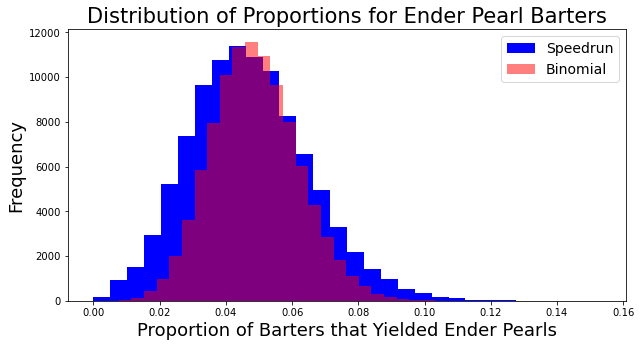

In [55]:
plt.figure(figsize=(10,5))
plt.hist(ender_speedrun_results, bins=30, color='blue', alpha=1.0, label='Speedrun')
plt.hist(ender_binomial_results, bins=30, color='red', alpha=0.5, label='Binomial')
plt.title("Distribution of Proportions for Ender Pearl Barters", fontsize=21)
plt.xlabel("Proportion of Barters that Yielded Ender Pearls", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.legend(fontsize=14)
plt.show()

In [54]:
df_ender_binomial = pd.DataFrame(ender_speedrun_results)
df_ender_binomial.describe()

,0
count,100000.000000
mean,0.047139
std,0.017977
min,0.000000
25%,0.034483
50%,0.046053
75%,0.058442
max,0.153226
